In [47]:
import pandas as pd
import numpy as np

train_data_original = pd.read_csv("basket_data_by_date_train.csv")
test_data_original = pd.read_csv("basket_data_by_date_test.csv")

In [48]:
# 删除从第10001行开始的缺失值
test_data_clean = test_data_original.iloc[:10000]

# 检查删除缺失值后的数据集大小
print("The size after cleaned the missing values", test_data_clean.shape)

The size after cleaned the missing values (10000, 7)


In [49]:
# delete unrelated columns
train_data = train_data_original.drop(columns=['BillNo', 'Date', 'Price', 'cost'])
test_data = test_data_clean.drop(columns=['BillNo', 'Date', 'Price', 'cost'])

In [50]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    40000 non-null  object 
 1   Price       40000 non-null  float64
 2   CustomerID  40000 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    10000 non-null  object 
 1   Price       10000 non-null  float64
 2   CustomerID  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


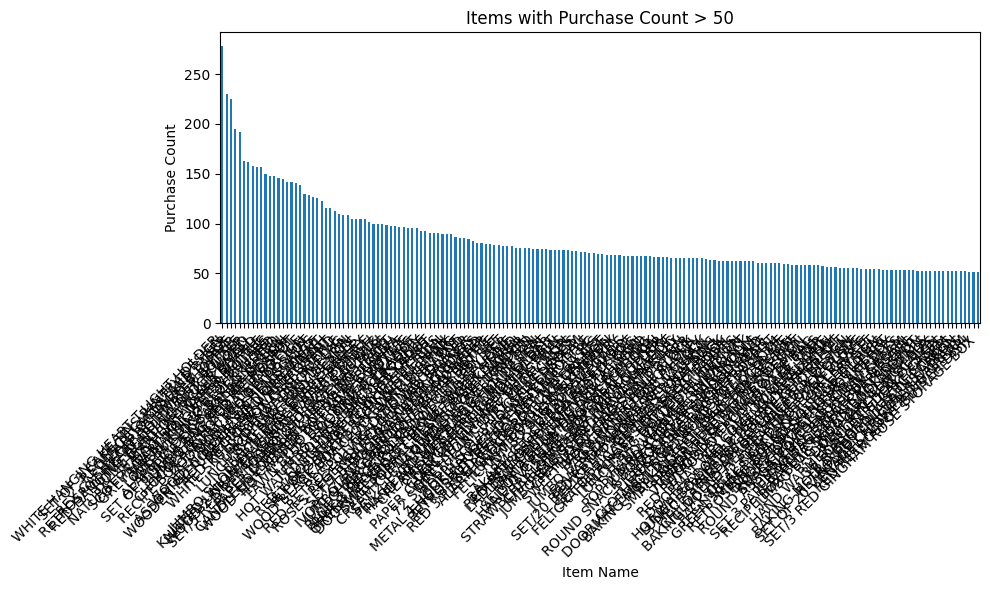

In [51]:
import matplotlib.pyplot as plt

# 计算每个商品的购买数量
item_purchase_count = train_data['Itemname'].value_counts()

# 过滤购买数量大于50的商品
popular_items = item_purchase_count[item_purchase_count > 50]

# 可视化
plt.figure(figsize=(10, 6))
popular_items.plot(kind='bar')
plt.title('Items with Purchase Count > 50')
plt.xlabel('Item Name')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
item_purchase_count = train_data['Itemname'].value_counts()
popular_items = item_purchase_count[item_purchase_count > 50]

# 过滤出购买数量大于50的商品数据
train_data = train_data[train_data['Itemname'].isin(popular_items.index)]

In [53]:
import pandas as pd

# 找到测试数据和训练数据中共同出现的商品名称和顾客ID
common_item_names = set(test_data['Itemname']).intersection(set(train_data['Itemname']))
common_customer_ids = set(test_data['CustomerID']).intersection(set(train_data['CustomerID']))

test_data = test_data[test_data['Itemname'].isin(common_item_names)]
test_data = test_data[test_data['CustomerID'].isin(common_customer_ids)]

train_data = train_data[train_data['Itemname'].isin(common_item_names)]
train_data = train_data[train_data['CustomerID'].isin(common_customer_ids)]

In [54]:
# 找出train_data中存在但test_data中不存在的商品名称和顾客ID
train_item_names = set(train_data['Itemname'])
train_customer_ids = set(train_data['CustomerID'])

extra_item_names_train = train_item_names - common_item_names
extra_customer_ids_train = train_customer_ids - common_customer_ids

# 找出test_data中存在但train_data中不存在的商品名称和顾客ID
test_item_names = set(test_data['Itemname'])
test_customer_ids = set(test_data['CustomerID'])

extra_item_names_test = test_item_names - common_item_names
extra_customer_ids_test = test_customer_ids - common_customer_ids

print("Train data中存在但test data中不存在的商品名称:", extra_item_names_train)
print("Train data中存在但test data中不存在的顾客ID:", extra_customer_ids_train)

print("Test data中存在但train data中不存在的商品名称:", extra_item_names_test)
print("Test data中存在但train data中不存在的顾客ID:", extra_customer_ids_test)


Train data中存在但test data中不存在的商品名称: set()
Train data中存在但test data中不存在的顾客ID: set()
Test data中存在但train data中不存在的商品名称: set()
Test data中存在但train data中不存在的顾客ID: set()


In [55]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4288 entries, 62 to 39996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    4288 non-null   object 
 1   Price       4288 non-null   float64
 2   CustomerID  4288 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 134.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 0 to 9978
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    1727 non-null   object 
 1   Price       1727 non-null   float64
 2   CustomerID  1727 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.0+ KB


In [56]:
# identify the users unique to the test set
unique_users = train_data['CustomerID'].unique()
unique_items = train_data['Itemname'].unique()

user_item_matrix = pd.DataFrame(index=unique_users, columns=unique_items)

# iterate over the rows in the train set and fill in the user-item matrix
for index, row in train_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    rating = row['Quantity']
    user_item_matrix.loc[user_id, item_id] = rating

# fill in the missing values with 0
user_item_matrix.fillna(0, inplace=True)

# check the user-item matrix
user_item_matrix.iloc[:10, :20]

KeyError: 'Quantity'

In [ ]:
user_item_matrix_array = user_item_matrix.values
user_item_matrix_array

array([[ 3, 10, 10, ...,  0,  0,  0],
       [ 1,  5,  3, ...,  0,  1,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0, 10, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  4],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
user_item_matrix_customers = user_item_matrix.index
user_item_matrix_customers

Index([14688, 15311, 12431, 17511, 13767, 17377, 12748, 14078, 12662, 15605,
       ...
       14507, 12759, 17049, 14013, 15206, 14645, 15071, 14112, 18231, 17867],
      dtype='int64', length=518)

In [ ]:
def similarity(user1, user2):
    # Calculate the dot product of the two user vectors
    dot_product = np.dot(user1, user2)
    # Calculate the magnitude of the two user vectors
    magnitude = np.sqrt(np.sum(user1 ** 2) * np.sum(user2 ** 2))
    # Calculate the similarity between the two users
    similarity = dot_product/magnitude
    return similarity

In [ ]:
def predict_rating(user_ratings, item_ratings):
    # 找到已评分item的用户索引
    rated_indices = np.where(item_ratings != 0)[0]

    # 获取电影的评分
    ratings = item_ratings[rated_indices]

    # 获取已评分用户的用户向量
    rated_users = user_ratings[rated_indices]

    # 计算已评分用户与目标用户之间的相似度
    similarities = [similarity(user_ratings[0], rated_users[i]) for i in range(len(rated_indices))]
    
    # 使用相似度作为权重计算加权平均评分
    weighted_sum = np.dot(similarities, ratings)
    weighted_sum /= np.sum(similarities)
    return weighted_sum

In [ ]:
def recommend_items(user_ratings, target_user):
    # 获取用户-物品评分矩阵的维度
    num_users, num_movies = user_ratings.shape

    # 找到目标用户尚未评分的物品索引
    unwatched_indices = np.where(user_ratings[target_user] == 0)[0]

    # 预测目标用户对尚未评分物品的评分
    predicted_ratings = [predict_rating(user_ratings, user_ratings[:, movie_index]) for movie_index in unwatched_indices]

    # 根据预测评分对物品索引进行排序（降序）
    sorted_indices = np.argsort(predicted_ratings)[::-1]

    # 将排名前3的物品索引转换为物品名称
    top_items = sorted_indices[:3]
    # recommended_movies = [f"Items {i+1}" for i in top_items]

    # 添加一个方法，转换成Itemname
    recommended_movies = [user_item_matrix.columns[i] for i in top_items]
    
    return recommended_movies

In [ ]:
total_precision = 0
total_users = 0

# 遍历所有用户，计算准确率
for user in range(user_item_matrix_array.shape[0]):
    recommended_items = recommend_items(user_item_matrix_array, user)
    be_recommended_user = user_item_matrix_customers[user]
    actual_items = test_data[test_data['CustomerID'] == be_recommended_user]['Itemname'].unique()

    # 计算真正例和假正例
    tp = len(set(recommended_items) & set(actual_items))
    fp = len(recommended_items) - tp

    # 计算准确率
    if (tp + fp) > 0:
        precision = tp / (tp + fp)
        total_precision += precision
        total_users += 1

# 计算平均准确率
average_precision = total_precision / total_users if total_users > 0 else 0

print("Average Precision:", average_precision)
